# Bagging & Random Forest
---
Anthony de los Santos. 


## Bagging, Bootstrap Agregation
 
 

In [ ]:
# import de paquetes 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

# paquete para trabajar con árboles de decisión 

from sklearn import tree

# Para dividir nuestro dataset en Train_set, test_set. 

from sklearn.model_selection import train_test_split


### Baggin aplicado en "Hitters.csv" 



- Antes de aplicar Bagging, se estudia árbol de regresión para el dataset Hitters.csv

Este dataset es usado para introducir el tema de árboles de regresión en el capitulo 8.1 

In [ ]:
# Cargamos el dataset 

hitters = pd.read_csv("https://raw.githubusercontent.com/anthonydlsantos/arbolesDecision/main/Hitters.csv")

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
#
# Habrá que filtrar los datos faltantes en "Salary" y después de eso, aplicar log("Salary")
#

# Se filtran los datos "NaN"
hitters = hitters.dropna()  

# Se agrega una columna a nuestro dataSet, "logSalary", que será el resultado de aplicar log("Salary")
logSalary = pd.DataFrame({"logSalary" : hitters["Salary"].transform( np.log )})
hitters = hitters.join( logSalary )

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,logSalary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,6.620073


- De aquí en delante, se trabajará para aplicar el método de árbol de regresión. 

Podríamos decir que lo anterior fue *"limpiar"* nuestro conjunto de datos descartando datos faltantes (NaN) y pasando a logaritmo los datos en Salary, para un mejor ajuste/entendimiento. 

In [ ]:
#
#     Train test split 
#

X = pd.DataFrame({ "Puntos": hitters["Hits"], "Años": hitters["Years"] })
y = hitters["logSalary"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
 

[Text(0.5, 0.8333333333333334, 'Años <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.25, 0.5, 'Hitts <= 15.5\nsquared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.176\nsamples = 2\nvalue = 7.243'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.371\nsamples = 88\nvalue = 5.058'),
 Text(0.75, 0.5, 'Hitts <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

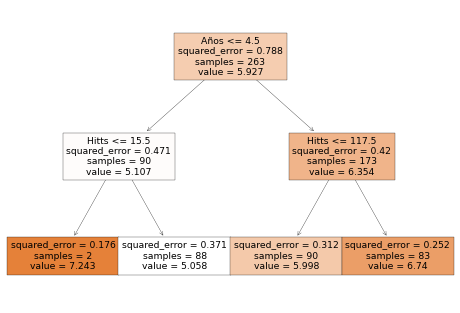

In [ ]:
#
# Árbol de regresión en hitters... 
#

ar = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X_train, y_train
ar.fit(X,y)

# Predicción aplicado en X_test.
prediccion = ar.predict(X_test)

tree.plot_tree(ar, feature_names=["Hitts","Años"], filled=True)


Similar a la figura 8.1 en el capitulo 8.


- A continuación un *intento* de mostrar la varianza en el método al "variar" el train_set. 
Esto estará a discusión. La alta varianza en los métodos de árboles, al "modificar" el train_set la predicción puede ser distinta. 


 Primeras 4 predicciones en X_test ... 
[5.83944758 5.83944758 6.6107417  6.6107417 ]  Utilizando X2_train como train_set 
[5.99837985 5.99837985 6.73968692 5.05822803]  El ejemplo inicial, X_train como train_set 


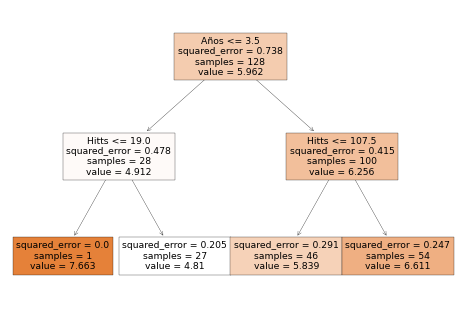

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.30)


ar2 = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X2_train, y2_train
ar2.fit(X2_train,y2_train)

# Predicción aplicado en X_test.
prediccion2 = ar2.predict(X_test)

tree.plot_tree(ar2, feature_names=["Hitts","Años"], filled=True)

print(" Primeras 4 predicciones en X_test ... ")
print(prediccion2[:4]," Utilizando X2_train como train_set ")
print(prediccion[:4]," El ejemplo inicial, X_train como train_set ")


### + Aplicando Bagging 

- Para esta parte, tomo en cuenta el error MSE en test_set. Para diferenciar entre los métodos (Árboles de regresión, Bagging, OOB, Random Forest, Random Forest OOB ).

Esto es, tenemos un conjunto para prueba, $y_{test}$ = y_test y la predicción $\hat{y}_{test}$ = método_prediccion()

Se trata de verificar la diferencia de errores en cada método. 

In [ ]:
# Métricas, MSE.

from sklearn.metrics import mean_squared_error

# MSE  en árbol de regresión 
error_ar = mean_squared_error( y_test, prediccion )

error_ar


0.30264182897606023

### Bagging en Hitters.csv

Ahora si, se aplica el método de Bagging a nuestro dataset Hitters.csv 

In [ ]:
#
# Importamos los paquetes para trabajar con Bagging. 
#

from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor( n_estimators = 250, 
                       max_samples = .7,
                      
                     )

# Aplicamos el método en X,y
br.fit(X_train,y_train) 

B_prediccion = br.predict(X_test)

print("Primeras 4 predicciones: ", B_prediccion[:4] )



Primeras 4 predicciones:  [5.89001383 5.66104048 6.95625273 6.42964571]


In [ ]:
# MSE en bagging... 

error_br = mean_squared_error( y_test, B_prediccion )
error_br 


0.29241637682558624

### OOB, Out-of-bag. 

In [ ]:

oobr = BaggingRegressor( n_estimators = 250,
                         max_samples = .7, 
                        #max_features = 1.,
                        oob_score = True )

# Aplicamos el método en X,y
oobr.fit(X_train,y_train) 

OOB_prediccion = oobr.predict(X_test)

print("Primeras 4 predicciones: ", OOB_prediccion[:4] )


Primeras 4 predicciones:  [5.8675478  5.67649848 6.96514932 6.41754547]


In [ ]:
# Error en OOB

error_oob = mean_squared_error(y_test, OOB_prediccion)
error_oob

0.29712090764230337

## Bosque Aleatorio ( Random forest ) 

In [ ]:
# Import de paquetes para trabajar con Random forest. 

from sklearn.ensemble import RandomForestRegressor   # Caso para regresión ...


In [ ]:
rf = RandomForestRegressor( n_estimators = 250,
                            max_samples = .7, 
                           #max_features = "auto",         
                          )

rf.fit(X_train,y_train)

rf_prediccion = rf.predict(X_test)

rf_prediccion[:4]

array([5.90250155, 5.70742106, 6.94295028, 6.42077251])

In [ ]:
# Error en random forest

error_rf = mean_squared_error( y_test, rf_prediccion )
error_rf

0.28280407194005314

### Variable importance 

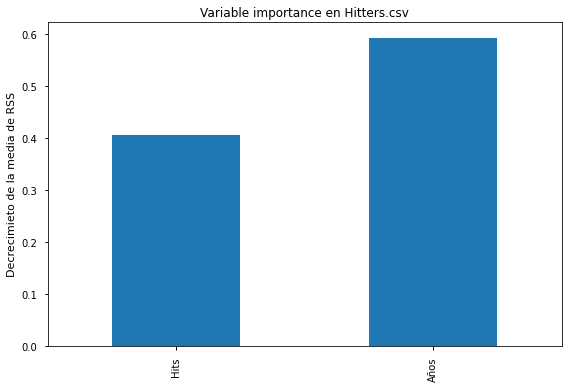

In [ ]:
# Var importance 

vImportance  = rf.feature_importances_
v_importance = pd.Series( vImportance, index=["Hits","Años"])

fig, ax = plt.subplots()
v_importance.plot.bar()

ax.set_title("Variable importance en Hitters.csv")
ax.set_ylabel("Decrecimieto de la media de RSS")

fig.tight_layout()



In [ ]:
# Random forest con OOB
rf_oob = RandomForestRegressor( n_estimators = 250 ,
                                max_samples = .7, 
                               #max_features = 1.,         
                               oob_score = True )
rf_oob.fit(X_train,y_train)
rfoob_prediccion = rf_oob.predict(X_test)

# Error en random forest con OOB
error_rfoob = mean_squared_error(y_test, rfoob_prediccion)
error_rfoob


0.2961017870636531

- En delante, se estudia la diferencia entre los errores de cada método. 

Esto es, el MSE en Árbol de regresión ( Un solo árbol ), Bagging, Random Forest.  

Tambiés se presenta la variación de MSE en función de la cantidad de árboles que se considera en Bagging y Random Forest. 

In [ ]:
# Errores juntos. 

# [Error con árbol de regresión, error con Bagging, error con Random forest, error OOB, error Random forest OOB.]
x_err = ["error_ar", "error_br", "error_rf", "error_oob", "error_rfoob"]
y_err = [error_ar, error_br, error_rf, error_oob, error_rfoob] 

y_err




[0.30264182897606023,
 0.29241637682558624,
 0.28280407194005314,
 0.29712090764230337,
 0.2961017870636531]

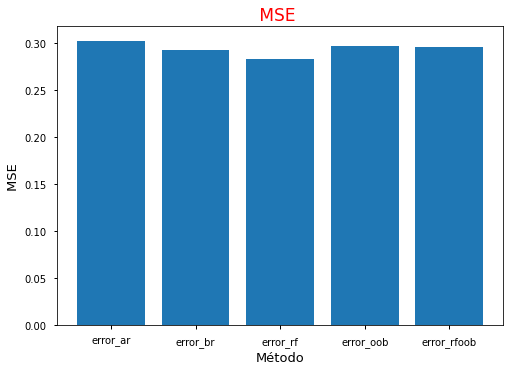

In [ ]:
#
# Para tener una idea, un plot básico
#


plt.bar(x_err,y_err)
plt.title(" MSE  ", fontSize=17, Color="red")
plt.xlabel("Método", fontSize=13)
plt.ylabel(" MSE ", fontSize=13)
plt.show()

 

## Sobre los Errores MSE 
---
Cabe la pregunta si al variar la cantidad de B-árboles en los métodos anteriores, también varía el MSE. 

Se presenta una Gráfica de MSE en función de B-árboles en los métodos Bagging y Random forest. 

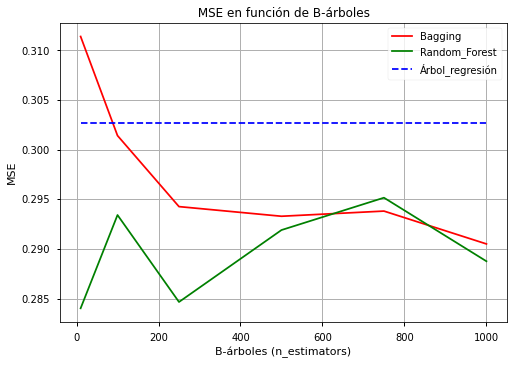

In [ ]:
#
#  ¿ Cambian los errores cuando se consideran B-árboles ( n_estimator = B[] ) ?
#

B_estimator = [10,100,250,500,750,1000]

# Probando con Bagging... 

B_bagg = [] # Lista de MSE variando B-árboles 

for i in B_estimator:
  b = BaggingRegressor( 
      n_estimators = i,
      max_samples = .7
  )

  b.fit(X_train,y_train)
  B_bagg.append( mean_squared_error(y_test, b.predict(X_test)) )

# Probando con Random:Forest

B_Rf = []

for i in B_estimator:
  r = RandomForestRegressor( 
      n_estimators = i,
      max_samples = .7
  )

  r.fit(X_train,y_train)
  B_Rf.append( mean_squared_error(y_test, r.predict(X_test)) )


# Plot ... 
plt.plot( B_estimator, B_bagg , color = "red", label="Bagging")
plt.plot( B_estimator, B_Rf , color="green", label="Random_Forest")
plt.plot( B_estimator,  error_ar*np.ones(len(B_estimator)), "--b", label="Árbol_regresión")

plt.legend()

plt.title(" MSE en función de B-árboles ")
plt.xlabel("B-árboles (n_estimators)")
plt.ylabel("MSE")

plt.grid()
plt.show()

